In [101]:
import numpy as np
import scipy.linalg
from tqdm import tqdm
import matplotlib.pyplot as plt
from itertools import product

In [102]:
# covariance matrix of fBm with Hurst index H

#for i in range(1, n_increments+1):
    #for j in range(1, n_increments+1):
        #cov[i-1,j-1] = (pow(j, 2*H) + pow(i, 2*H) - pow(abs(i-j), 2*H))/2

def fBm_cov(n_increments, H):
    idx = np.linspace(1,n_increments,n_increments)
    t, s = np.zeros(pow(n_increments,2)), np.zeros(pow(n_increments,2))

    k = 0
    for i in product(idx, idx):
        t[k], s[k] = i
        k = k + 1
    
    cov = (pow(s, 2*H) + pow(t, 2*H) - pow(abs(t-s), 2*H)) * 0.5

    return np.reshape(cov, (n_increments,n_increments))

In [146]:
def simulate_fBm(n_paths: int, n_increments: int, H: float, cholesky = True) -> np.ndarray:

    if H < 0 or H > 1:
        print("0 <= H <= 1 not satisfied")

    else:
        control = np.zeros(n_paths)
        fBm_paths = np.zeros((n_paths,n_increments))

        for k in tqdm(range(n_paths)):

            cov = np.zeros((n_increments,n_increments))
            cov = fBm_cov(n_increments, H)

            # eigendecomposition
            if cholesky: # fast
                sigma = np.transpose(scipy.linalg.cholesky(cov))
                control[k] = np.all(np.matmul(sigma,np.transpose(sigma)) - cov < 1e-06)
            else: # quite slow   
                lambd, P = np.linalg.eig(cov)
                lambd = np.diag(np.sqrt(lambd))
                sigma = np.matmul(np.matmul(P, lambd), np.linalg.inv(P))
                control[k] = np.all(np.matmul(sigma, sigma) - cov < 1e-06)

            normal = np.random.normal(size=n_increments)

            # path = sigma.v
            fBm_paths[k, :] = sigma.dot(normal)

        if np.all(control):
            print("Good news, everyone! I think I perfected a scheme that will simulate all paths!")
        return fBm_paths

In [157]:
paths = simulate_fBm(100,1000,0.12,True)

100%|██████████| 100/100 [00:32<00:00,  3.04it/s]

True


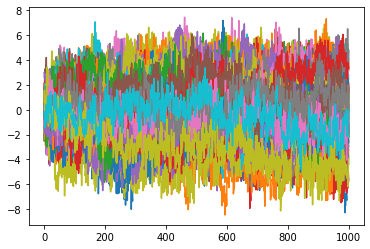

In [158]:
for i in range(paths.shape[0]):
    plt.plot(paths[i])
plt.show()